In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Loading csv data to pandas dataframe
diabetes = pd.read_csv("diabetes.csv")
heart = pd.read_csv("heart.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


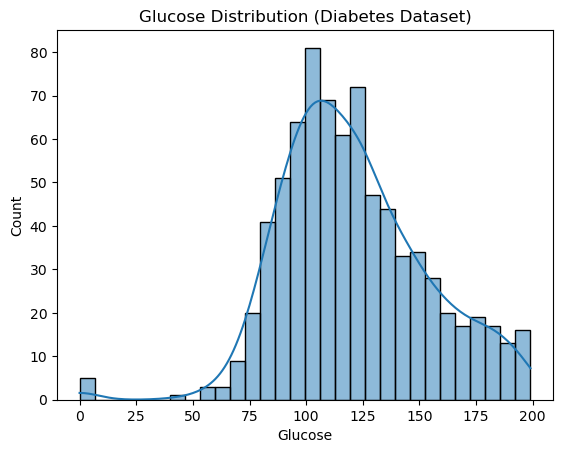

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(diabetes['Glucose'], bins=30, kde=True)
plt.title("Glucose Distribution (Diabetes Dataset)")
plt.show()

Most patients have glucose levels clustered between 100–150, with some showing elevated levels — a key indicator for diabetes risk.

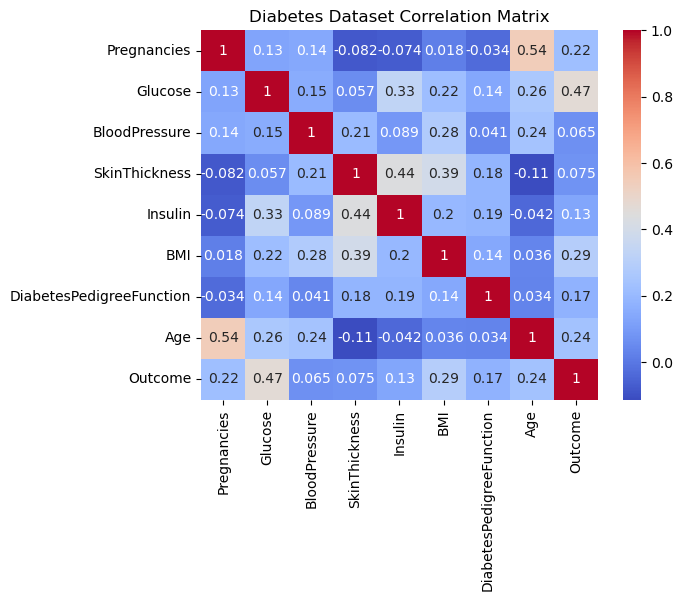

In [14]:
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm')
plt.title("Diabetes Dataset Correlation Matrix")
plt.show()

Heart disease shows strongest correlation with features like chest pain (cp), ST depression (oldpeak), and exercise-induced angina (exang).

In [17]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


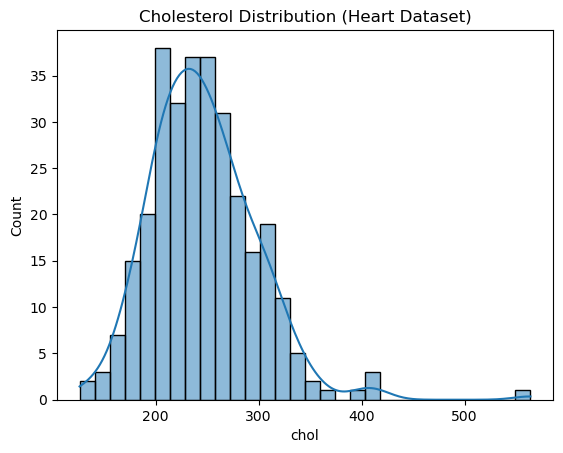

In [19]:
sns.histplot(heart['chol'], bins=30, kde=True)
plt.title("Cholesterol Distribution (Heart Dataset)")
plt.show()

Cholesterol values are skewed right, with a significant number of patients above 200 — a clinical risk threshold for heart disease.

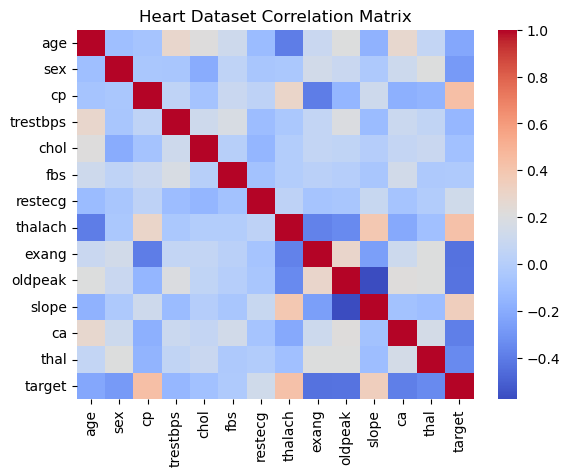

In [22]:
sns.heatmap(heart.corr(), cmap='coolwarm')
plt.title("Heart Dataset Correlation Matrix")
plt.show()

Heart disease shows strongest correlation with features like chest pain (cp), ST depression (oldpeak), and exercise-induced angina (exang).

# No of rows and column in datasets

In [26]:
diabetes.shape

(768, 9)

In [28]:
heart.shape

(303, 14)

# Getting some info about datasets

In [31]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checking for the misising values in the datasets

In [36]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Statstical measure about datasets

In [41]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
diabetes['target'] = diabetes['Outcome']
heart['Age'] = heart['age']
diabetes.drop('Outcome', axis=1, inplace=True)
heart.drop('age', axis = 1, inplace = True)
heart.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,63
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,37
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,56
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,57


# checking the distribution of target variables in datasets 

In [48]:
diabetes['target'].value_counts()

target
0    500
1    268
Name: count, dtype: int64

0 ---> Non Diabetic

1 ---> Diabetic

In [51]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

0 --->  Healthy Heart

1 ---> Defective Heart

In [54]:
diabetes.groupby('target').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [56]:
heart.groupby('target').mean()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age
target,,,,,,,,,,,,,
0,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,56.601449
1,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,52.496970


# Concate both Dataset

In [59]:
combined = pd.concat([heart, diabetes], ignore_index=True)
imputer = SimpleImputer(strategy='mean')
combined_imputed = pd.DataFrame(imputer.fit_transform(combined), columns=combined.columns)
combined_imputed[['sex', 'cp', 'Age']] = combined_imputed[['sex', 'cp','Age']].astype(int)

In [61]:
combined_imputed.head(15)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal,target,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,...,1.0,1.0,63,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
1,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,...,2.0,1.0,37,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
2,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,...,2.0,1.0,41,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
3,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,...,2.0,1.0,56,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
4,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,...,2.0,1.0,57,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
5,1,0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,...,1.0,1.0,57,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
6,0,1,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,...,2.0,1.0,56,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
7,1,1,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,...,3.0,1.0,44,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
8,1,2,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,...,3.0,1.0,52,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
9,1,2,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,...,2.0,1.0,57,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876


In [63]:
combined_imputed['target'].value_counts()

target
0.0    638
1.0    433
Name: count, dtype: int64

# Data Standardization

In [66]:
X= combined_imputed.drop(columns='target', axis = 1)
y = combined_imputed['target'] 
columns = X.columns

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
features_scaled = pd.DataFrame(X_scaled, columns=columns)
features_scaled

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,2.043016,3.894698,1.436288e+00,-0.481925,4.501705,-1.891032e+00,2.903348e-02,-1.309712e+00,2.044269,-4.276361,-1.343174,-4.040026,1.630142,0.000000,0.000000,0.000000,0.000000,0.000000,-1.064956e-15,1.979787e-16
1,2.043016,2.466197,-1.743533e-01,0.135740,-0.785181,1.690110e+00,3.071036e+00,-1.309712e+00,3.990580,-4.276361,-1.343174,-0.964328,-0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.064956e-15,1.979787e-16
2,-0.489473,1.037697,-1.743533e-01,-1.535588,-0.785181,-1.891032e+00,1.837792e+00,-1.309712e+00,0.584536,1.835608,-1.343174,-0.964328,0.122176,0.000000,0.000000,0.000000,0.000000,0.000000,-1.064956e-15,1.979787e-16
3,2.043016,1.037697,-1.248114e+00,-0.372925,-0.785181,1.690110e+00,2.331090e+00,-1.309712e+00,-0.388620,1.835608,-1.343174,-0.964328,1.150335,0.000000,0.000000,0.000000,0.000000,0.000000,-1.064956e-15,1.979787e-16
4,-0.489473,-0.390804,-1.248114e+00,3.914394,-0.785181,1.690110e+00,1.097845e+00,2.698801e+00,-0.713005,1.835608,-1.343174,-0.964328,1.218879,0.000000,0.000000,0.000000,0.000000,0.000000,-1.064956e-15,1.979787e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.489473,-0.390804,-3.051813e-15,0.000000,0.000000,-7.951731e-16,-2.336728e-15,-2.225172e-16,0.000000,0.000000,0.000000,0.000000,1.630142,2.158469,-0.735280,0.420911,2.034382,1.027422,1.360037e-01,-1.073065e+00
1067,-0.489473,-0.390804,-3.051813e-15,0.000000,0.000000,-7.951731e-16,-2.336728e-15,-2.225172e-16,0.000000,0.000000,0.000000,0.000000,-0.837439,-0.647039,0.040857,0.054611,0.478792,-0.818236,7.205329e-01,-4.703324e-01
1068,-0.489473,-0.390804,-3.051813e-15,0.000000,0.000000,-7.951731e-16,-2.336728e-15,-2.225172e-16,0.000000,0.000000,0.000000,0.000000,-0.631807,0.405027,0.003898,0.176711,0.182489,0.330173,-8.681875e-01,-8.091467e-01
1069,-0.489473,-0.390804,-3.051813e-15,0.000000,0.000000,-7.951731e-16,-2.336728e-15,-2.225172e-16,0.000000,0.000000,0.000000,0.000000,0.533439,-0.997727,0.188692,-0.555889,-1.521253,-0.818236,-2.836583e-01,-4.382342e-01


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       128
         1.0       0.75      0.75      0.75        87

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215

ROC AUC: 0.8685344827586207


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, y, test_size=0.2, stratify=y, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       128
         1.0       0.74      0.75      0.74        87

    accuracy                           0.79       215
   macro avg       0.78      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215

ROC AUC: 0.8525053879310345


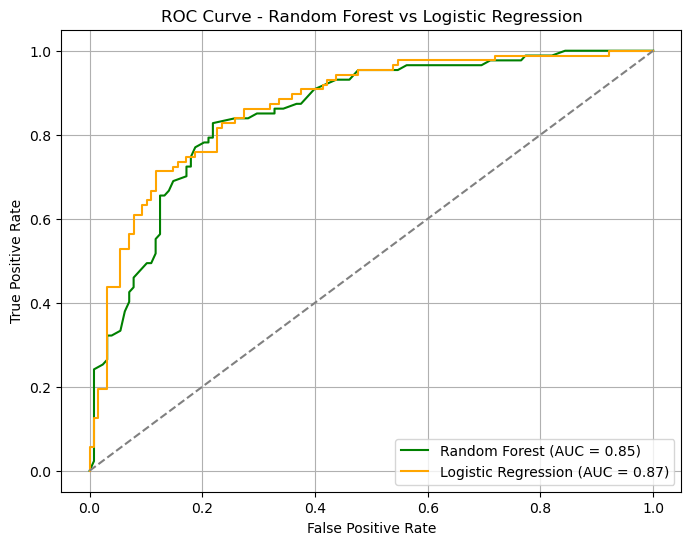

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities
rf_probs = rf.predict_proba(X_test)[:, 1]
lr_probs = log_reg.predict_proba(X_test)[:, 1]

# ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# AUC scores
auc_rf = auc(fpr_rf, tpr_rf)
auc_lr = auc(fpr_lr, tpr_lr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


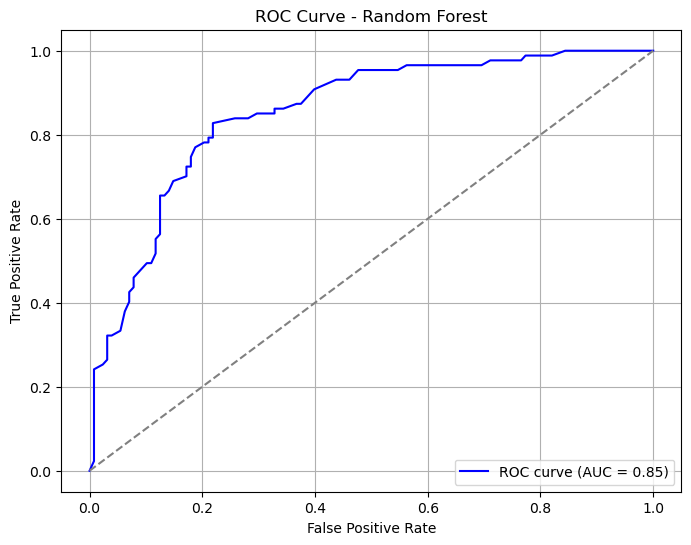

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [161]:
def simulate_risk_over_time(raw_input, weeks=12):
    risk_scores = []
    data = raw_input.copy()

    for _ in range(weeks):
        # Simulate lifestyle improvements
        if 'BMI' in data:
            data['BMI'] = max(data['BMI'] - 0.2, 18.5)
        if 'Glucose' in data:
            data['Glucose'] = max(data['Glucose'] - 1, 70)
        if 'chol' in data:
            data['chol'] = max(data['chol'] - 2, 100)
        if 'BloodPressure' in data:
            data['BloodPressure'] = max(data['BloodPressure'] - 1, 90)
        if 'trestbps' in data:
            data['trestbps'] = max(data['trestbps'] - 1, 90)
        if 'fbs' in data and weeks >= 4:
            data['fbs'] = 0
        if 'exang' in data and weeks >= 6:
            data['exang'] = 0
        if 'restecg' in data and weeks >= 8:
            data['restecg'] = 0

        # Create input DataFrame
        input_df = pd.DataFrame([data], columns=X.columns)

        # Scale
        scaled = scaler.transform(input_df)
        scaled_df = pd.DataFrame(scaled, columns=X.columns)

        # Predict risk
        risk = rf.predict_proba(scaled_df)[0][1]
        risk_scores.append(risk)

    return risk_scores


user_input = X.iloc[15] 
initial_input = user_input.to_dict()

# Get simulated risks
risk_scores = simulate_risk_over_time(initial_input)

# Plot or print
print("Weekly Risk Scores:", risk_scores)



Weekly Risk Scores: [0.95, 0.95, 0.93, 0.88, 0.88, 0.88, 0.88, 0.87, 0.85, 0.83, 0.82, 0.81]


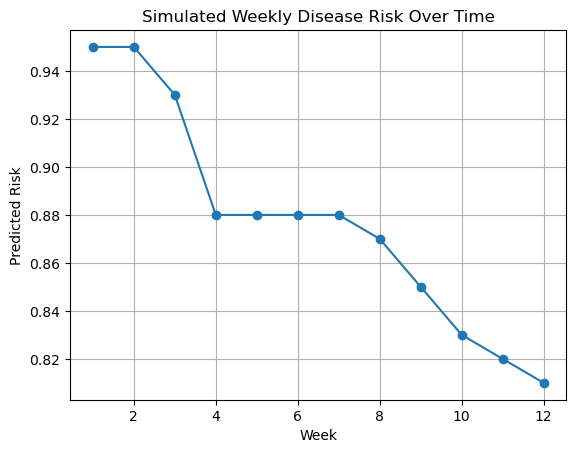

In [163]:
import matplotlib.pyplot as plt

plt.plot(range(1, 13), risk_scores, marker='o')
plt.title("Simulated Weekly Disease Risk Over Time")
plt.xlabel("Week")
plt.ylabel("Predicted Risk")
plt.grid(True)
plt.show()


In [146]:
from sklearn.cluster import KMeans

lifestyle_features = ['BMI', 'Glucose', 'chol', 'trestbps', 'Age', 
                      'fbs', 'exang', 'restecg', 'BloodPressure', 'Pregnancies']

missing = [col for col in lifestyle_features if col not in features_scaled.columns]
if missing:
    print(f"⚠️ Missing features: {missing}")
else:
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    features_scaled['cluster'] = kmeans.fit_predict(features_scaled[lifestyle_features])

    def get_recommendation(cluster):
        return {
            0: "You’re in a low-risk group. Maintain physical activity.",
            1: "Moderate risk: Start low-impact exercise & monitor sugar intake.",
            2: "High risk: Consult a physician and adopt a diet plan."
        }[cluster]

    features_scaled['recommendation'] = features_scaled['cluster'].apply(get_recommendation)


In [148]:
print(features_scaled[['cluster', 'recommendation']].head())

   cluster                                     recommendation
0        2  High risk: Consult a physician and adopt a die...
1        0  You’re in a low-risk group. Maintain physical ...
2        0  You’re in a low-risk group. Maintain physical ...
3        0  You’re in a low-risk group. Maintain physical ...
4        0  You’re in a low-risk group. Maintain physical ...


In [150]:
user_scaled = features_scaled.iloc[14]
print("Cluster:", user_scaled['cluster'])
print("Recommendation:", user_scaled['recommendation'])

user_features_scaled = user_scaled.drop(['cluster', 'recommendation'])
original_values = scaler.inverse_transform([user_features_scaled])
original_df = pd.DataFrame(original_values, columns=user_features_scaled.index)

print(original_df.T)


Cluster: 2
Recommendation: High risk: Consult a physician and adopt a diet plan.
                                   0
sex                         0.000000
cp                          3.000000
trestbps                  150.000000
chol                      283.000000
fbs                         1.000000
restecg                     0.000000
thalach                   162.000000
exang                       0.000000
oldpeak                     1.000000
slope                       2.000000
ca                          0.000000
thal                        2.000000
Age                        58.000000
Pregnancies                 3.845052
Glucose                   120.894531
BloodPressure              69.105469
SkinThickness              20.536458
Insulin                    79.799479
BMI                        31.992578
DiabetesPedigreeFunction    0.471876


In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

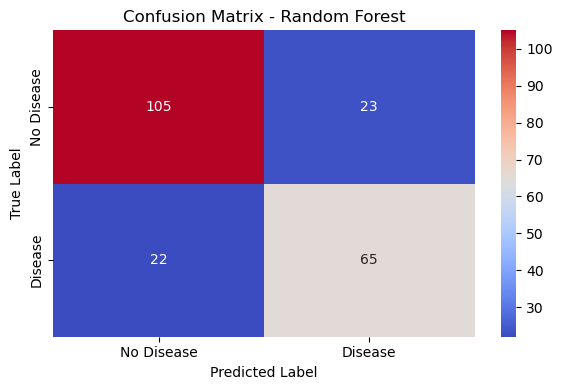

In [154]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True ,fmt='g', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

Our Model predicted 105 true Negative(No disease) and 22 False Negative(Disease) it predicted 23 False Positive (No disease) and 65 True Positive (Disease)